In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
df_comb = pd.read_csv('/Users/kennedy/Downloads/data_sets/mod_2/combined.csv') 
df_comb.drop(columns='Unnamed: 0',axis=1,inplace=True)

df_comb.head()
df_comb.describe()

,std_cases,Population,Rate,Male,Female,a0_14,a15_19,a20_24,a25_29,a30_34,a35_39,a40plus,sum
count,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000
mean,"502,966.1569","329,281,313.0784",147.2016,"156,000.5882","345,880.7843","7,654.4902","160,148.0196","177,885.5882","77,527.0392","35,494.4510","18,687.1176","22,347.6078","1,604,977.1176"
std,"579,411.5970","369,400,719.8086",62.9801,"186,171.6055","392,960.3684","8,300.4155","174,908.8577","199,853.0054","94,091.6247","45,727.2712","25,258.8460","32,055.4282","2,090,792.6099"
min,"21,516.0000","29,856,231.0000",53.6100,"5,512.0000","16,001.0000",143.0000,"6,822.0000","8,871.0000","3,196.0000","1,289.0000",603.0000,487.0000,"133,025.0000"
25%,"102,938.0000","91,006,351.5000",104.2800,"32,824.0000","70,085.5000","1,267.5000","29,095.0000","38,308.5000","17,988.0000","7,846.5000","3,886.5000","4,132.0000","388,190.0000"
50%,"330,536.0000","238,302,156.0000",141.5000,"96,432.0000","227,942.0000","4,461.0000","96,072.0000","123,841.0000","48,694.0000","21,463.0000","11,074.0000","12,168.0000","935,719.0000"
75%,"591,506.0000","363,758,505.0000",172.4700,"178,361.0000","407,399.5000","10,371.5000","194,702.0000","213,540.5000","85,797.0000","37,809.0000","20,297.5000","23,953.0000","2,119,977.0000"
max,"2,922,206.0000","2,035,831,281.0000",418.3500,"995,473.0000","1,917,596.0000","35,694.0000","769,198.0000","996,218.0000","509,811.0000","257,329.0000","146,987.0000","192,437.0000","11,990,930.0000"


#### Pairplot belot shows that strong multicollinearity between almost all of the data.  I would have dropped all of the data, however I could not collect data from the dating web site APIs.

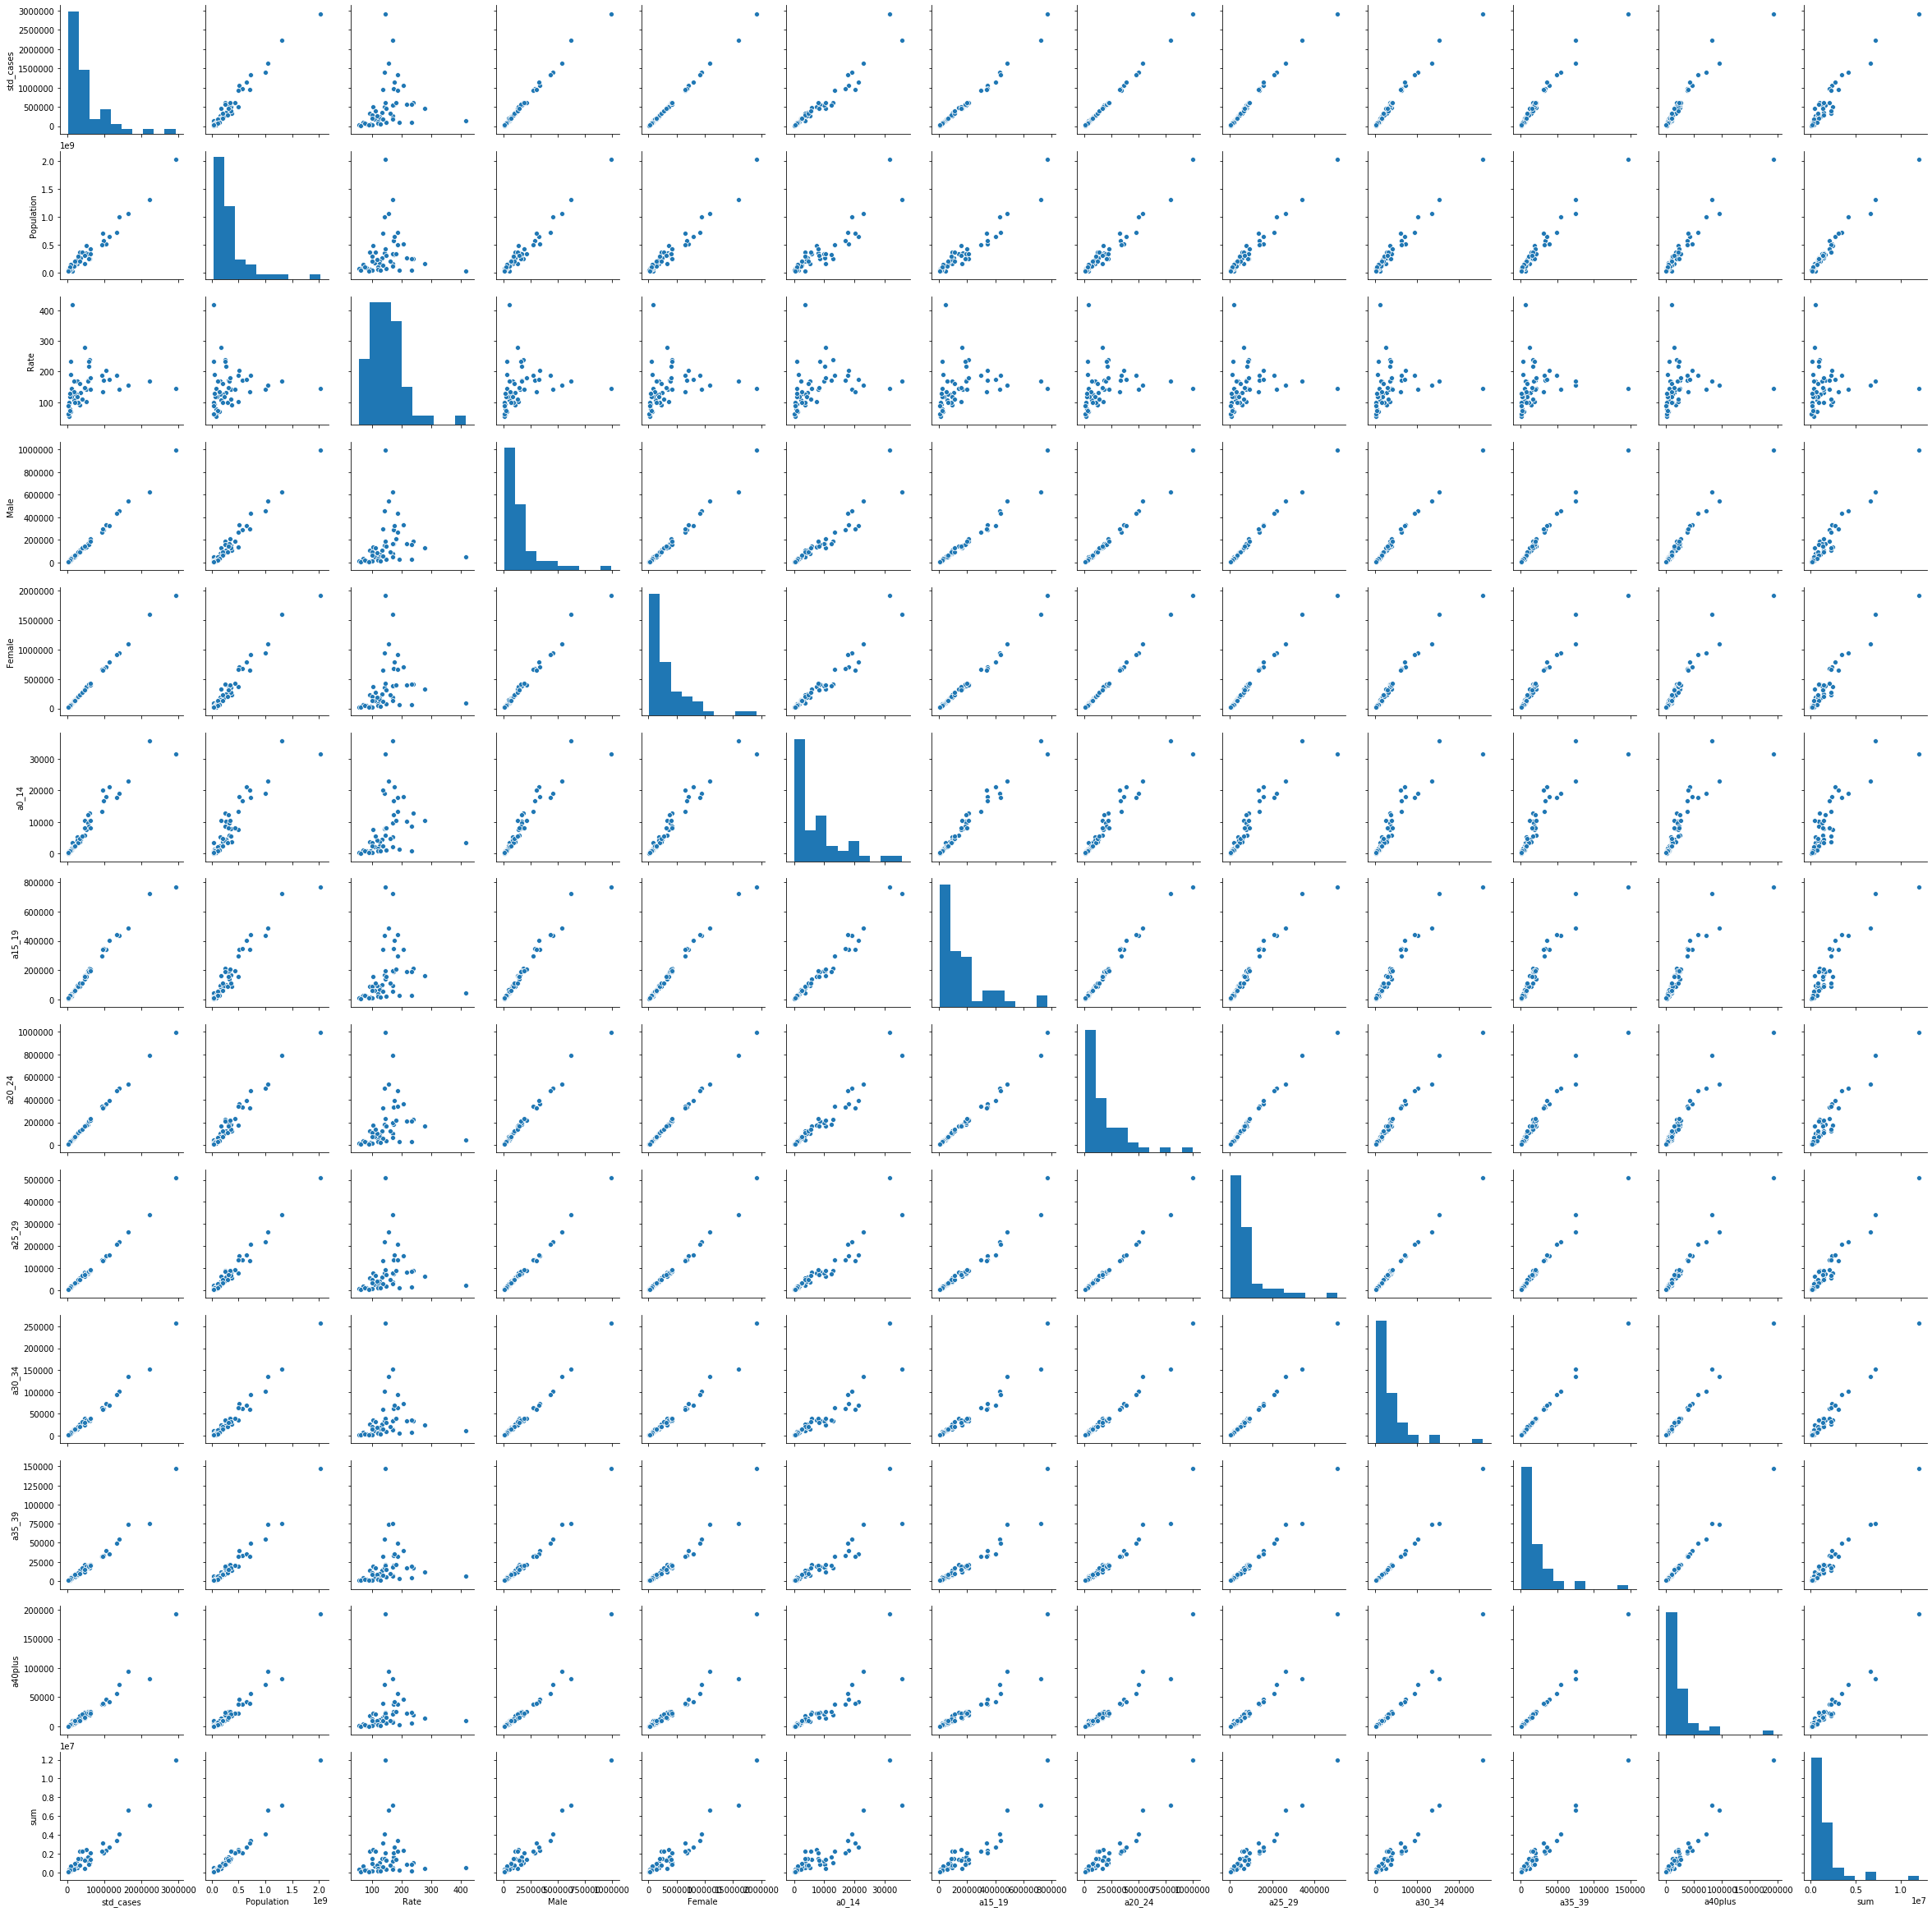

In [4]:
sns.pairplot(df_comb);

In [5]:
X = df_comb.drop("std_cases", axis=1)
y = df_comb["std_cases"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
lr_model = LinearRegression()

X_train_numeric = X_train[["Population", "Rate", "Male", "Female", "a0_14" , "a15_19" , "a20_24", "a25_29", "a30_34", "a35_39", "a35_39","a40plus","sum"]].copy()
X_test_numeric = X_test[["Population", "Rate", "Male", "Female", "a0_14" , "a15_19" , "a20_24", "a25_29", "a30_34", "a35_39", "a35_39","a40plus","sum"]].copy()

In [7]:
lr_model.fit(X_train_numeric, y_train)
X_train_numeric_R2 = (lr_model.score(X_train_numeric, y_train)) 
X_test_numeric_R2 = (lr_model.score(X_test_numeric, y_test)) 
print(f"Train R-squared = " + f"{X_test_numeric_R2}.")
print(f"Test R-squared = " + f"{X_test_numeric_R2}.")

Train R-squared = 0.9998924599865974.
Test R-squared = 0.9998924599865974.


#### The Train and Test R-squareds confirm that the data is too closely related.  As so much time was wasted ckeaning the data, there was not enough time to start over from scratch.

In [8]:
baseline_cross_val_score = cross_val_score(lr_model, X_train_numeric, y_train, cv=5)
baseline_cross_val_score

array([0.99999002, 0.99999785, 0.99992254, 0.99992803, 0.99995599])

In [9]:
baseline_cross_val_score = cross_val_score(lr_model, X_test_numeric, y_test, cv=5)
baseline_cross_val_score

array([0.9999763 , 0.99988459, 0.99998181, 0.99997851, 0.9999783 ])

In [10]:
formula = 'std_cases ~ ' + '+'.join(X_test_numeric.columns)
data = X_test_numeric.join(y_test)

In [11]:
data.head()

,Population,Rate,Male,Female,a0_14,a15_19,a20_24,a25_29,a30_34,a35_39,a35_39,a40plus,sum,std_cases
43,1313004909,169.4600,626148,1595564,35694,724574,792662,340737,152095,75551,75551,81877,7210045,2224989
40,245073435,234.3100,160613,412155,8627,189762,207797,83900,36432,19117,19117,23866,935719,574228
46,429905796,142.9500,189896,423730,8085,195856,230818,94279,40203,20200,20200,23033,2131570,614552
12,81353355,78.5900,17846,45896,713,20834,25436,9629,3893,1682,1682,1510,308207,63938
24,165231300,278.2100,128648,330826,10340,164740,168547,64238,24586,11936,11936,14097,459337,459699


In [12]:
plt.style.use('ggplot')
mod = smf.ols(formula=formula, data = data)
res = mod.fit()
res.summary()

/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))
/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              std_cases   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 12 Mar 2020   Prob (F-statistic):                nan
Time:                        22:39:32   Log-Likelihood:                 135.77
No. Observations:                  13   AIC:                            -245.5
Df Residuals:                       0   BIC:                            -238.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -95.0456        inf         -0        nan         nan         nan
Population  2.614e-06        inf          0        nan         nan         nan
Rate           0.6976        inf          0        nan         nan         nan
Male           0.6981        inf          0        nan         nan         nan
Female         0.7453        inf          0        nan         nan         nan
a0_14          1.1025        inf          0        nan         nan         nan
a15_19         0.0887        inf          0        nan         nan         nan
a20_24         0.5468        inf          0        nan         nan         nan
a25_29        -0.5799        inf         -0        nan         nan         nan
a30_34         1.1935        inf          0        nan         nan         nan
a35_39[0]      0.7033        inf          0        nan         nan         nan
a35_39[1]      0.7033        inf          0        nan         nan         nan
a40plus       -0.2507        inf         -0        nan         nan         nan
sum           -0.0016        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                        1.199   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                0.069
Skew:                           0.051   Prob(JB):                        0.966
Kurtosis:                       3.342   Cond. No.                     4.34e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The condition number is large, 4.34e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### I could not discover why there were somany NaNs.  I tried feature engineering to salvage something from the model.

In [13]:
df_comb['pc_female'] = np.array(df_comb['Female']) / np.array(df_comb['Population'])*100

In [14]:
df_comb['pc_male'] = np.array(df_comb['Male']) / np.array(df_comb['Population'])*100

In [15]:
df_comb.drop('Population', axis=1, inplace=True)
df_comb.drop('Male', axis=1, inplace=True)
df_comb.drop('Female', axis=1, inplace=True)

#### New data below.  I removed the column with the largest coefficient, Population, by dividing it into the Male and Female infected columns.

In [16]:
df_comb.head()

,state,std_cases,Rate,a0_14,a15_19,a20_24,a25_29,a30_34,a35_39,a40plus,sum,pc_female,pc_male
0,Alabama,569174,217.5800,10197,192448,210016,80988,34192,16700,21855,886942,0.1521,0.0645
1,Alaska,89281,234.1100,860,24902,32195,15180,7030,3817,5183,218937,0.1552,0.0790
2,Arizona,477074,143.6400,5814,138729,167598,80661,39186,21042,24040,1393189,0.0993,0.0443
3,Arkansas,270043,170.1500,5126,96072,99112,37938,15565,7241,7951,513676,0.1181,0.0520
4,California,2922206,143.5400,31677,769198,996218,509811,257329,146987,192437,11990930,0.0942,0.0489


In [17]:
X = df_comb.drop("std_cases", axis=1)
y = df_comb["std_cases"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
lr2_model = LinearRegression()

X_train_numeric_eng = X_train[["Rate", "a0_14" , "a15_19" , "a20_24", "a25_29", "a30_34", "a35_39", "a35_39","a40plus","sum", "pc_female","pc_male"]].copy()
X_test_numeric_eng = X_test[["Rate", "a0_14" , "a15_19" , "a20_24", "a25_29", "a30_34", "a35_39", "a35_39","a40plus","sum", "pc_female","pc_male"]].copy()

In [19]:
lr2_model.fit(X_train_numeric_eng, y_train)
X_train_numeric_eng_R2 = (lr2_model.score(X_train_numeric_eng, y_train)) 
X_test_numeric_eng_R2 = (lr2_model.score(X_test_numeric_eng, y_test)) 
print(f"Train R-squared LR2 = " + f"{X_test_numeric_R2}.")
print(f"Test R-squared LR2 = " + f"{X_test_numeric_R2}.")

Train R-squared LR2 = 0.9998924599865974.
Test R-squared LR2 = 0.9998924599865974.


In [21]:
sorted(list(zip(X_test_numeric_eng.keys(),lr2_model.coef_)),key=lambda x:x[1],reverse=True)

[('Rate', 5568.690872476116),
 ('a30_34', 1.91533468054892),
 ('a15_19', 1.1864704499954544),
 ('a20_24', 0.9603427082707694),
 ('a35_39', 0.8370269924705052),
 ('a35_39', 0.8368139028466355),
 ('a40plus', 0.72708945463011),
 ('a25_29', 0.29114138141814394),
 ('sum', 0.0028567685651471374),
 ('a0_14', -0.341247715504134),
 ('pc_female', -5511348.267574074),
 ('pc_male', -5647914.003410156)]

In [22]:
#testing a predict
Y_pred_test_numeric_eng = lr2_model.predict(X_test_numeric_eng)  # make predictions

In [23]:
baseline_cross_val_score = cross_val_score(lr2_model, X_train_numeric_eng, y_train, cv=5)
baseline_cross_val_score

array([0.9999967 , 0.99999611, 0.99977958, 0.99987427, 0.99991014])

In [30]:
baseline_cross_val_score = cross_val_score(lr2_model, X_test_numeric_eng, y_test, cv=5)
baseline_cross_val_score


array([0.99728351, 0.99822875, 0.99818613, 0.99938216, 0.99884876])

In [31]:
data = X_train_numeric_eng.join(y_train)
data_test = X_test_numeric_eng.join(y_test)

In [32]:
formula = 'std_cases ~ ' + '+'.join(X_train_numeric_eng.columns)
data = data

In [33]:
formula_test = 'std_cases ~ ' + '+'.join(X_test_numeric_eng.columns)
data = data_test

In [34]:
plt.style.use('ggplot')
mod = smf.ols(formula=formula, data = data)
res = mod.fit()
res.summary()

/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              std_cases   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.698e+06
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           0.000599
Time:                        22:43:17   Log-Likelihood:                -83.170
No. Observations:                  13   AIC:                             190.3
Df Residuals:                       1   BIC:                             197.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5460.3126    941.913     -5.797      0.109   -1.74e+04    6507.831
Rate        3570.5617   2237.090      1.596      0.356   -2.49e+04     3.2e+04
a0_14          2.0654      0.845      2.445      0.247      -8.668      12.799
a15_19         0.8566      0.207      4.130      0.151      -1.779       3.492
a20_24         1.4917      0.321      4.652      0.135      -2.583       5.566
a25_29        -1.4553      0.897     -1.622      0.352     -12.856       9.945
a30_34         4.5664      0.797      5.732      0.110      -5.556      14.689
a35_39[0]      0.8777      1.003      0.875      0.542     -11.866      13.622
a35_39[1]      0.8775      1.003      0.875      0.542     -11.868      13.623
a40plus       -0.1671      0.885     -0.189      0.881     -11.408      11.074
sum            0.0039      0.002      1.599      0.356      -0.027       0.035
pc_female  -3.405e+06   2.23e+06     -1.526      0.369   -3.18e+07     2.5e+07
pc_male    -3.847e+06   2.27e+06     -1.697      0.339   -3.27e+07     2.5e+07
==============================================================================
Omnibus:                        4.355   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                1.614
Skew:                           0.052   Prob(JB):                        0.446
Kurtosis:                       4.723   Cond. No.                     1.41e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.35e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
plt.style.use('ggplot')
mod = smf.ols(formula=formula_test, data = data_test)
res = mod.fit()
res.summary()

/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              std_cases   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.698e+06
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           0.000599
Time:                        22:43:22   Log-Likelihood:                -83.170
No. Observations:                  13   AIC:                             190.3
Df Residuals:                       1   BIC:                             197.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5460.3126    941.913     -5.797      0.109   -1.74e+04    6507.831
Rate        3570.5617   2237.090      1.596      0.356   -2.49e+04     3.2e+04
a0_14          2.0654      0.845      2.445      0.247      -8.668      12.799
a15_19         0.8566      0.207      4.130      0.151      -1.779       3.492
a20_24         1.4917      0.321      4.652      0.135      -2.583       5.566
a25_29        -1.4553      0.897     -1.622      0.352     -12.856       9.945
a30_34         4.5664      0.797      5.732      0.110      -5.556      14.689
a35_39[0]      0.8777      1.003      0.875      0.542     -11.866      13.622
a35_39[1]      0.8775      1.003      0.875      0.542     -11.868      13.623
a40plus       -0.1671      0.885     -0.189      0.881     -11.408      11.074
sum            0.0039      0.002      1.599      0.356      -0.027       0.035
pc_female  -3.405e+06   2.23e+06     -1.526      0.369   -3.18e+07     2.5e+07
pc_male    -3.847e+06   2.27e+06     -1.697      0.339   -3.27e+07     2.5e+07
==============================================================================
Omnibus:                        4.355   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                1.614
Skew:                           0.052   Prob(JB):                        0.446
Kurtosis:                       4.723   Cond. No.                     1.41e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.35e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Removing outliers and scaling the data.  It led back to NaNs for the pvalues, but cleaned the coefficients.

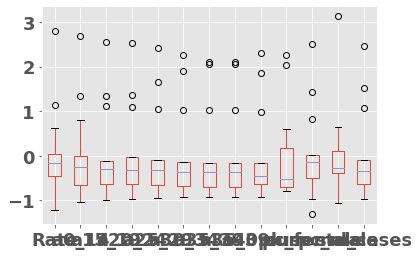

In [43]:
ss = StandardScaler()
column_names = data_test.columns
data_test = pd.DataFrame(ss.fit_transform(data_test))
data_test.columns = column_names
data_test.boxplot()

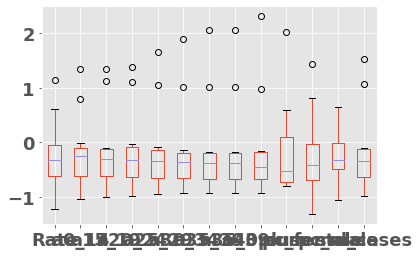

In [44]:
data_test = data_test[(np.abs(data_test) < 2.5).all(axis=1)]
data_test.boxplot()

In [45]:
mod = smf.ols(formula=formula_test, data = data_test)
res = mod.fit()
res.summary()

/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/kennedy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              std_cases   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 12 Mar 2020   Prob (F-statistic):                nan
Time:                        22:48:50   Log-Likelihood:                 347.02
No. Observations:                  11   AIC:                            -672.0
Df Residuals:                       0   BIC:                            -667.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0009        inf         -0        nan         nan         nan
Rate           0.2167        inf          0        nan         nan         nan
a0_14          0.0204        inf          0        nan         nan         nan
a15_19         0.3006        inf          0        nan         nan         nan
a20_24         0.4607        inf          0        nan         nan         nan
a25_29        -0.0949        inf         -0        nan         nan         nan
a30_34         0.1472        inf          0        nan         nan         nan
a35_39[0]      0.0653        inf          0        nan         nan         nan
a35_39[1]      0.0653        inf          0        nan         nan         nan
a40plus        0.0203        inf          0        nan         nan         nan
sum            0.0158        inf          0        nan         nan         nan
pc_female     -0.1273        inf         -0        nan         nan         nan
pc_male       -0.0891        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                        3.220   Durbin-Watson:                   2.423
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                0.712
Skew:                           0.447   Prob(JB):                        0.701
Kurtosis:                       3.869   Cond. No.                     4.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
states_gdp = list(df_comb['sum'])
categories = list(df_comb['state'])
infections = list(df_comb['std_cases'])

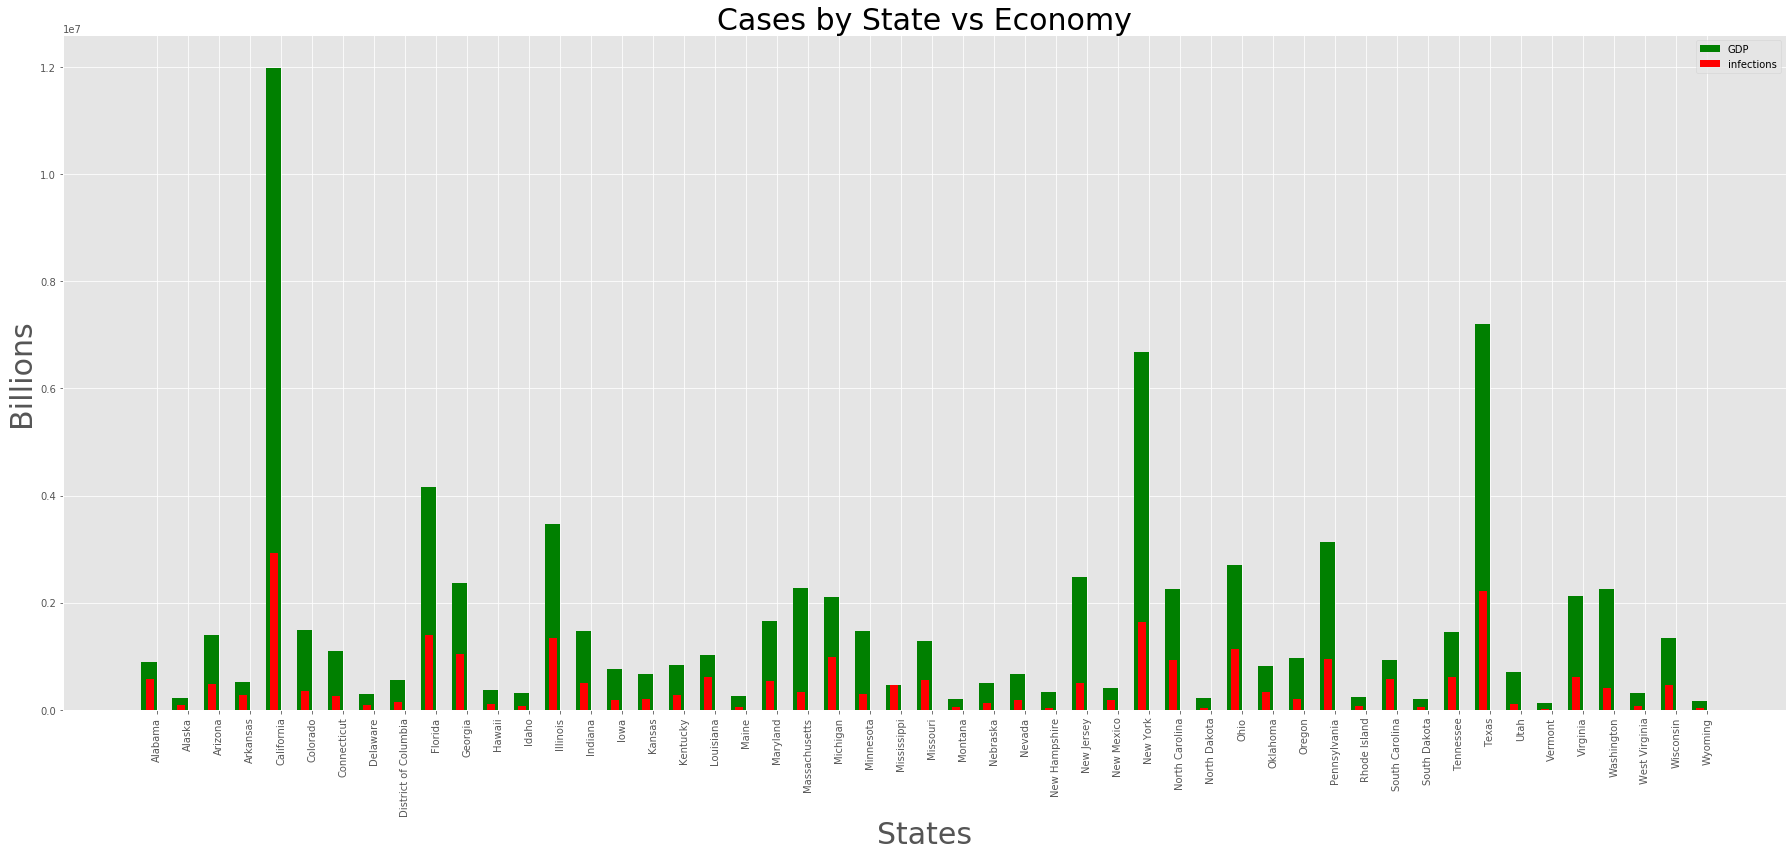

In [37]:
width = .5
plt.figure(figsize=(25,12))
indices = np.arange(len(categories))

plt.bar(indices, states_gdp, width=width, 
        color='g', label='GDP')
plt.bar([i+.05*width for i in indices], infections, 
        width=0.5*width, color='red', alpha=1, label='infections')
plt.xticks(indices+width/2., categories, rotation='vertical')
plt.ylabel('Billions', fontsize=30)
plt.title('Cases by State vs Economy', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.subplots_adjust(bottom=0.20)
plt.legend()
plt.tight_layout()
#plt.savefig('statecasesvsgdp.svg')
plt.show();

In [38]:
df_comb.head()

,state,std_cases,Rate,a0_14,a15_19,a20_24,a25_29,a30_34,a35_39,a40plus,sum,pc_female,pc_male
0,Alabama,569174,217.5800,10197,192448,210016,80988,34192,16700,21855,886942,0.1521,0.0645
1,Alaska,89281,234.1100,860,24902,32195,15180,7030,3817,5183,218937,0.1552,0.0790
2,Arizona,477074,143.6400,5814,138729,167598,80661,39186,21042,24040,1393189,0.0993,0.0443
3,Arkansas,270043,170.1500,5126,96072,99112,37938,15565,7241,7951,513676,0.1181,0.0520
4,California,2922206,143.5400,31677,769198,996218,509811,257329,146987,192437,11990930,0.0942,0.0489


In [39]:
age_sums = []
categories = ['a0_14', 'a15_19', 'a20_24', 'a25_29', 'a30_34', 'a35_39', 'a35_39','a40plus']
for x in categories:
    age_sums.append((df_comb[x].sum()))
 

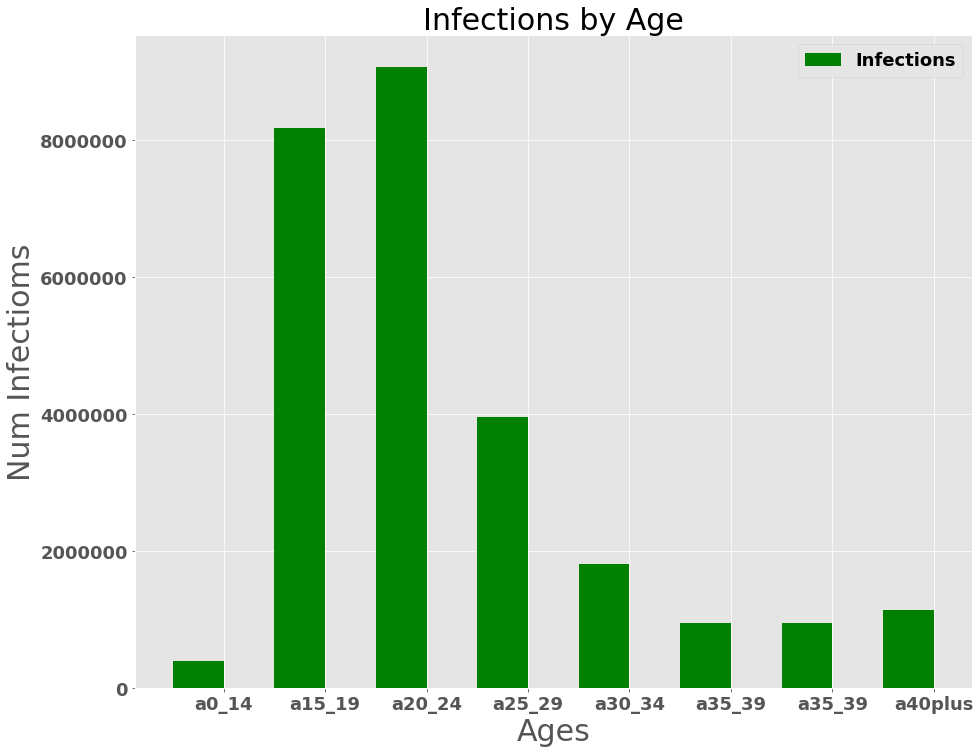

In [40]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)

width = .5
plt.figure(figsize=(15,12))
indices = np.arange(len(categories))

plt.bar(indices, age_sums, width=width, 
        color='g', label='Infections')
plt.xticks(indices+width/2., categories)
plt.ylabel('Num Infectioms', fontsize=30)
plt.title('Infections by Age', fontsize=30)
plt.xlabel('Ages', fontsize=30)
plt.legend()
#plt.savefig('infections_age.svg')
plt.show();

In [41]:
df_comb.head()

,state,std_cases,Rate,a0_14,a15_19,a20_24,a25_29,a30_34,a35_39,a40plus,sum,pc_female,pc_male
0,Alabama,569174,217.5800,10197,192448,210016,80988,34192,16700,21855,886942,0.1521,0.0645
1,Alaska,89281,234.1100,860,24902,32195,15180,7030,3817,5183,218937,0.1552,0.0790
2,Arizona,477074,143.6400,5814,138729,167598,80661,39186,21042,24040,1393189,0.0993,0.0443
3,Arkansas,270043,170.1500,5126,96072,99112,37938,15565,7241,7951,513676,0.1181,0.0520
4,California,2922206,143.5400,31677,769198,996218,509811,257329,146987,192437,11990930,0.0942,0.0489


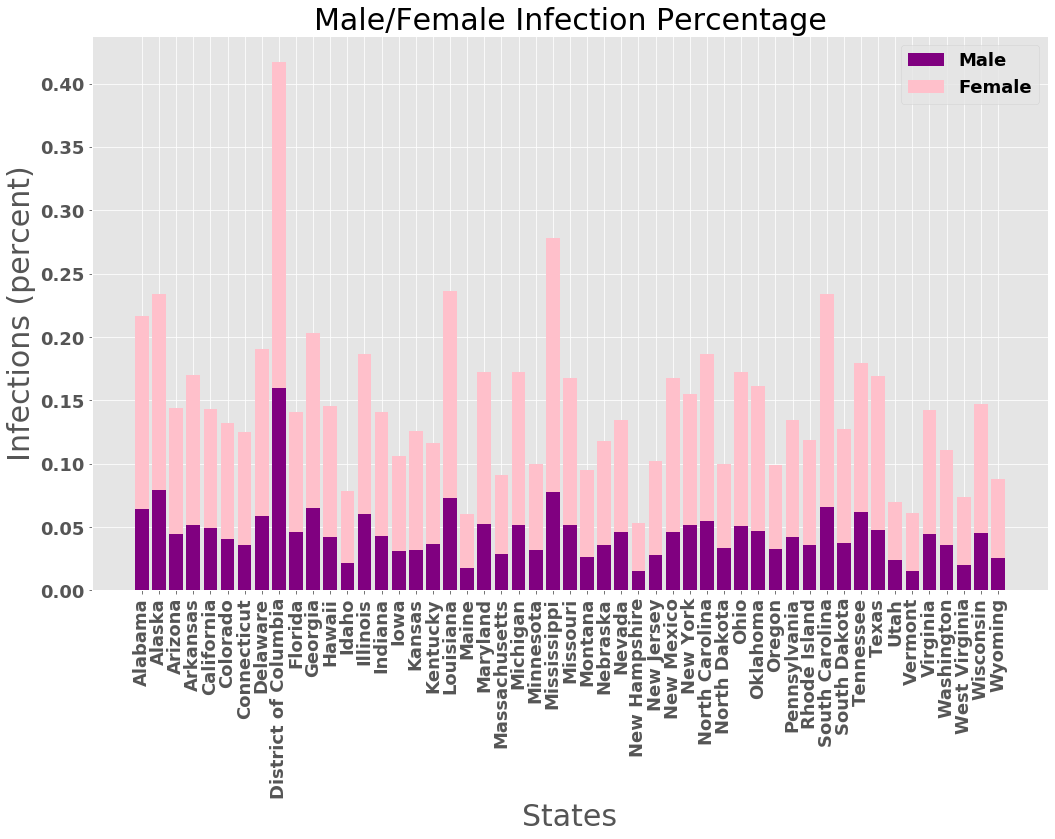

In [42]:
plt.figure(figsize=(15,12))

indices = list(df_comb['state'])
male_pct = df_comb['pc_male']
female_pct = df_comb['pc_female']
width = .5


plt.bar(range(len(indices)), male_pct, color='purple')
plt.bar(range(len(indices)), female_pct, color='pink', bottom=male_pct)
plt.title('Male/Female Infection Percentage', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.ylabel('Infections (percent)', fontsize=30)
plt.xticks(range(len(indices)), indices, rotation='vertical')

plt.legend(['Male', 'Female'])
plt.tight_layout()
plt.savefig('mf_inf_percent.svg')
plt.show();